<h2 style="text-align: center;">Machine Learning Project - Drug Analysis</h2>

<hr>

<h3>The Dean's team:</h3>

<ul>
    <li>
        <strong>Student 1:</strong><br>
        Full Name: MOUMMADE Rhita<br>
        Student Number/ID: 20220006
    </li>
    <br>
    <li>
        <strong>Student 2:</strong><br>
        Full Name: ROBERT Anaïs<br>
        Student Number/ID: 20221370
    </li>
    <br>
    <li>
        <strong>Student 3:</strong><br>
        Full Name: SULPICE Alban<br>
        Student Number/ID: 20221091
    </li>
</ul>
<h2 style="text-aligleftter; color: #333;">I : Introduction</h2>
<hr style="border: 1px solid #2196F3;">

In [390]:
import pandas as pd
# Load the data
data = pd.read_csv("/Users/anaisrobert/Desktop/Machine learning/projet/drug200.csv")

# Check if it loaded correctly
print(data.head())
print(data.dtypes)

# Size of the dataset
num_records, num_features = data.shape
print(f"Number of records (rows): {num_records}")
print(f"Number of features (columns): {num_features}")



   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
Number of records (rows): 200
Number of features (columns): 6



<h3>Dataset Overview</h3>

<p><strong>The dataset contains:</strong></p>
<ul>
    <li><strong>200 records</strong> (rows) of patient data</li>
    <li><strong>6 features</strong> (columns) including :
        <ul>
            <li>The Age variable is numerical and represents the age of each patient.</li>
            <li>The Sex variable is categorical, with two possible values: "M" for male and "F" for female.</li>
            <li>The BP (Blood Pressure) variable indicates the patient's blood pressure level and is categorized as "HIGH," "LOW," or "NORMAL."</li>
            <li>The Cholesterol variable describes the cholesterol level of each patient, which can either be "HIGH" or "NORMAL."</li>
            <li>The Na_to_K variable is numerical and shows the sodium-to-potassium ratio for each patient.</li>
            <li>The Drug variable, which is the target variable, represents the specific drug prescribed to a patient, such as drugA, drugB, and so on.</li></li>
</ul>
        
<p>So we can see that the dataset consists of information about patients and the drugs prescribed to them.</p>
<h3>Why Classification Applies to Our Dataset </h3> 
<p>The drug200.csv dataset is focused on determining the type of drug to prescribe to a patient based on their medical attributes. Here's how it fits a classification problem: </p>

<ol>
    <li>Target Variable (Output):</li>
    <ul> 
        <li> The Drug column contains labels for five drug  types: drugA, drugB, drugC, drugX, and drugY.</li> 
        <li> These labels are discrete categories, making this a multiclass classification  problem.</li>
    </ul> 
    <li>Input Features (Predictors): </li>
    <ul> 
        <li> Patient characteristics like Age (numerical), Sex (categorical), BP (categorical), Cholesterol (categor ical), and Na_to_K (numerical) are used to predict the class of the drug. </li>
    </ul> 
    <li>Objective:</li>
    <ul> 
        <li> The goal is to classify patients into one of the five drug categories based on  their attributes. This aligns with the essence of classification tasks, where the model assigns predefined labels to input data. </li>
    </ul>
</ol>
<h3>What kind of Problem? </h3>
<p>In healthcare, prescribing the correct drug based on a patient’s profile is critical for effective treatment. Physicians need a reliable method to recommend drugs tailored to individual needs, considering factors like age, blood pressure, cholesterol levels, and electrolyte balance.</p>
<ul>
<li>Situation: You are a data analyst working for a healthcare provider. The organization has collected data on 200 patients, including their prescribed drugs and key medical indicators. Your task is to build a machine learning model to classify new patients into the correct drug category based on their medical attributes. </li>
<li>Objective: Develop a classification model that predicts the prescribed drug (Drug) using patient data (Age, Sex, BP, Cholesterol, and Na_to_K). This model will assist physicians in making accurate and data-driven drug recommendations. </li>
</ul>

<h2 style="text-aligleftter; color: #333;">II : Data Preparation</h2>
<hr style="border: 1px solid #2196F3;">

<h3>Data Loading and Structure</h3><p>The drug200.csv dataset contains medical data on patients and their prescribed drugs. It includes 200 records and 6 attributes, each representing a key medical factor or the target label for drug classification.</p>
<h3>Data Cleaning</h3>
<h4>Encoding Categorical Variables</h4>

<p><strong>Why? </strong>Machine learning models work with numerical data, so categorical features (like Sex, BP, and Cholesterol) need to be converted into numerical values.</p>

<h4>Previewing Encoded Data</h4>
<p> After encoding, the dataset is displayed again to confirm the transformations.
This step ensures the dataset is clean, consistent, and ready for building machine learning models.</p>

<p>To ensure the dataset's quality and consistency, the data cleaning process involved handling any potential inconsistencies or missing values. Although the dataset used for this project was complete and did not require imputation, a check was performed to verify the absence of null or erroneous data. Additionally, no irrelevant features were identified for removal, as all columns directly contribute to the classification task. This step is essential to prevent inaccuracies in model training caused by poor-quality data.</p>>

In [394]:
import pandas as pd

# File paths
input_file = './drug200.csv'
output_file = './drug200_modified.csv'

# Load the data
data = pd.read_csv(input_file)
print("Original Data:")
display(data.head())

# Data Preprocessing
# Encoding 'Sex' column: M -> 1, F -> 2
data['Sex'] = data['Sex'].map({'M': 1, 'F': 2})

# Encoding 'BP' column: HIGH -> 3, NORMAL -> 2, LOW -> 1
data['BP'] = data['BP'].map({'HIGH': 3, 'NORMAL': 2, 'LOW': 1})

# Encoding 'Cholesterol' column: HIGH -> 3, NORMAL -> 2, LOW -> 1
data['Cholesterol'] = data['Cholesterol'].map({'HIGH': 3, 'NORMAL': 2, 'LOW': 1})

# Encoding 'Drug' column: drugA -> 1, drugB -> 2, drugC -> 3, drugX -> 4, drugY -> 5
data['Drug'] = data['Drug'].map({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5})

print("\nData after Encoding:")
display(data.head())

# Save the modified data to a new CSV file
data.to_csv(output_file, index=False)


Original Data:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY



Data after Encoding:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,3,3,25.355,5
1,47,1,1,3,13.093,3
2,47,1,1,3,10.114,3
3,28,2,2,3,7.798,4
4,61,2,1,3,18.043,5


<h3>Feature Engineering</h3>
<h4>Why Standardize?</h4>

<p>Standardization ensures that numerical features have the same scale, which prevents features with larger ranges (e.g., Ageor Na_to_K) from dominating others. This is achieved by centering the data around a mean of 0 and scaling it to have a standard deviation of 1.</p>

<p>Feature engineering focused on preparing the dataset for machine learning algorithms by encoding categorical variables and scaling numerical features. Categorical columns such as Sex, BP, Cholesterol, and Drug were converted into numerical representations using label encoding to make them interpretable by the model. Numerical features, like Age and Na_to_K, were standardized to ensure all variables have the same scale, improving the performance and convergence speed of algorithms. This preprocessing step ensures the dataset is ready for training.</p>

In [397]:
# Standardizing 'Age' and 'Na_to_K' columns
# Calculate mean and standard deviation
age_mean = data['Age'].mean()
age_std = data['Age'].std()

na_to_k_mean = data['Na_to_K'].mean()
na_to_k_std = data['Na_to_K'].std()
"""
cholesterol_mean = data['Cholesterol'].mean()
cholesterol_std = data['Cholesterol'].std()

bp_mean = data['BP'].mean()
bp_std = data['BP'].std()
"""
# Apply standardization
data['Age'] = (data['Age'] - age_mean) / age_std
data['Na_to_K'] = (data['Na_to_K'] - na_to_k_mean) / na_to_k_std
"""
data['Cholesterol'] = (data['Cholesterol'] - cholesterol_mean) / cholesterol_std
data['BP'] = (data['BP'] - bp_mean) / bp_std
"""

print("\nData after Standardization:")
data.head()



Data after Standardization:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.288358,2,3,3,1.283302,5
1,0.162291,1,1,3,-0.414106,3
2,0.162291,1,1,3,-0.826484,3
3,-0.986139,2,2,3,-1.147084,4
4,1.008504,2,1,3,0.271114,5


<h2 style="text-aligleftter; color: #333;">III : Exploratory Data Analysis (EDA)</h2>
<hr style="border: 1px solid #2196F3;"> <h3>Why EDA ?</h3>
<h4>Understand the Distribution of Features: </h4>
<p>Visualize both standardized and non- standardized features (Age and Na_to_K) to assess their ranges and distributions. </p>
<h4>Key Insights: </h4>
<ul>
<li>Detect potential outliers or unusual patterns.</li> <li>Observe the central tendency and spread of features before and after
standardization.</li>
</ul>

<h3>1. Visualizing Distributions</h3>
<p>To explore the dataset, the distributions of features were visualized both before and after standardization. These distributions provide insights into the central tendency, variability, and potential outliers.</p>
<ul>
<li>Non-Standardized Age Distribution</li> <ins>Description:</ins> The distribution of Age (in its original scale) shows how patients are spread across different age groups. <ins>Insights:</ins> Most patients fall around the mean age (44 years), with few extreme values observed.
<p><ins>Visualization:</ins>The histogram shows the age distribution in its original scale.</p>

<li>Non-Standardized Na_to_K Distribution</li>
<ins>Description:</ins> The Na_to_K (Sodium-to-Potassium ratio) feature shows a slightly skewed distribution, reflecting variability in the patient population.
<ins>Insights:</ins> This skewness may indicate potential outliers or subpopulations.
</ul>
        </ul>
    </div>
</body>
</html>


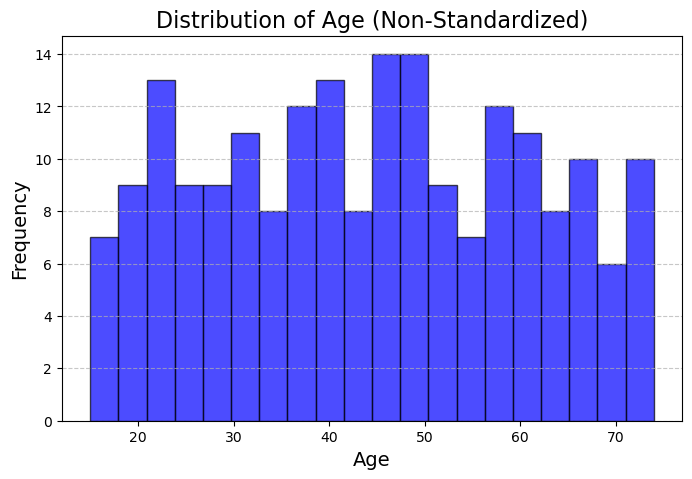

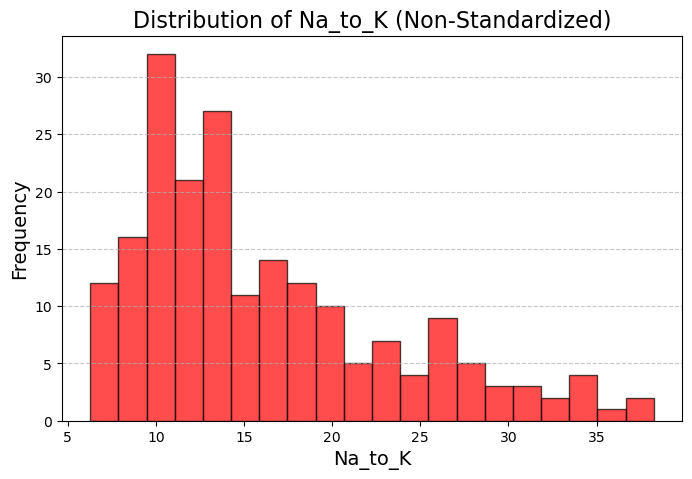

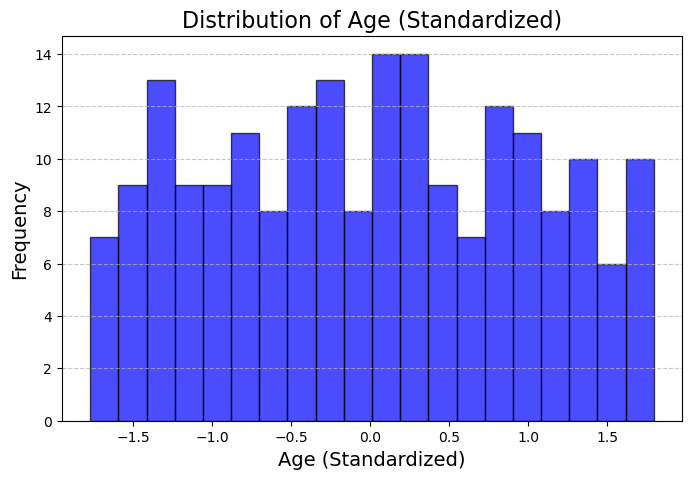

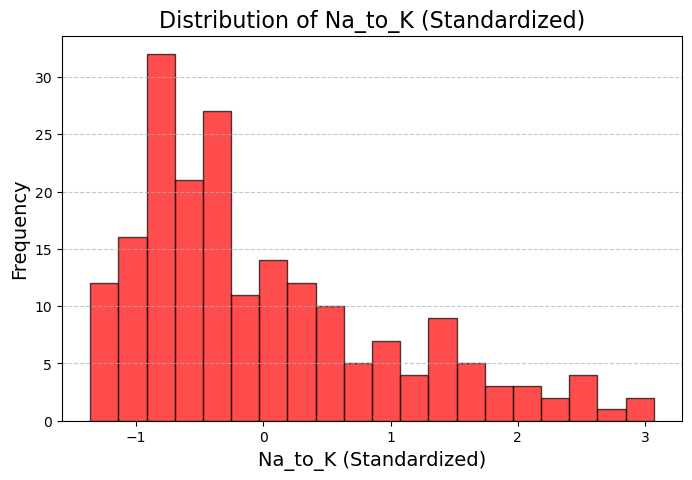

In [400]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` contains standardized columns: 'Age' and 'Na_to_K'

# Mean and standard deviation of the original data
# Replace these with the original values
age_mean = 44.315  # Example mean of Age from the original data
age_std = 16.544   # Example standard deviation of Age from the original data

na_to_k_mean = 16.084485  # Example mean of Na_to_K from the original data
na_to_k_std = 7.223956    # Example standard deviation of Na_to_K from the original data

# Reverse standardization to get non-standardized values
data['Age_non_standardized'] = (data['Age'] * age_std) + age_mean
data['Na_to_K_non_standardized'] = (data['Na_to_K'] * na_to_k_std) + na_to_k_mean

# Plot non-standardized Age distribution
plt.figure(figsize=(8, 5))
plt.hist(data['Age_non_standardized'], bins=20, edgecolor='k', alpha=0.7, color='blue')
plt.title('Distribution of Age (Non-Standardized)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot non-standardized Na_to_K distribution
plt.figure(figsize=(8, 5))
plt.hist(data['Na_to_K_non_standardized'], bins=20, edgecolor='k', alpha=0.7, color='red')
plt.title('Distribution of Na_to_K (Non-Standardized)', fontsize=16)
plt.xlabel('Na_to_K', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot standardized Age distribution
plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=20, edgecolor='k', alpha=0.7, color='blue')
plt.title('Distribution of Age (Standardized)', fontsize=16)
plt.xlabel('Age (Standardized)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot standardized Na_to_K distribution
plt.figure(figsize=(8, 5))
plt.hist(data['Na_to_K'], bins=20, edgecolor='k', alpha=0.7, color='red')
plt.title('Distribution of Na_to_K (Standardized)', fontsize=16)
plt.xlabel('Na_to_K (Standardized)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h3>2. Reverse Standardization</h3>
<h4>Why? </h4>
<p>Standardized values (mean = 0, std = 1) are harder to interpret. Reverse standardization helps revert the values to their original scale for better interpretability.</p>
<h3>3. Distributions of Categorical Variables</h3>
<p>The categorical variables (Sex, BP, Cholesterol, Drug) were analyzed to understand the proportions of their respective categories.</p>

<p><strong>Key Findings</strong></p>
<ul>
    <li>Balanced Features: Sex and Cholesterol are relatively balanced, reducing bias.</li>
    <li>Imbalanced Target: The Drug variable has an uneven distribution, which might require techniques like oversampling or weighted loss functions to ensure fairness.</li>
</ul>
<p><strong>Important Predictors:</strong></p>
<ul>
    <li>BPshowssignificantvariabilityacrosscategories.</li>
    <li>CholesterolandSexareequallydistributed,ensuringfairanalysis.</li>
</ul>

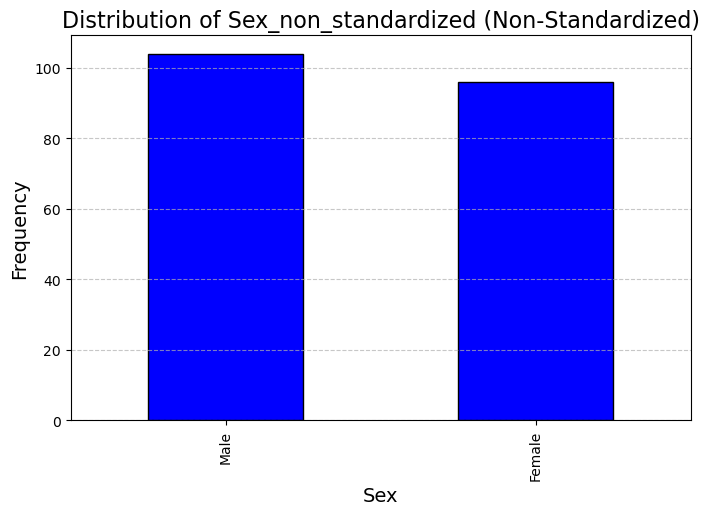

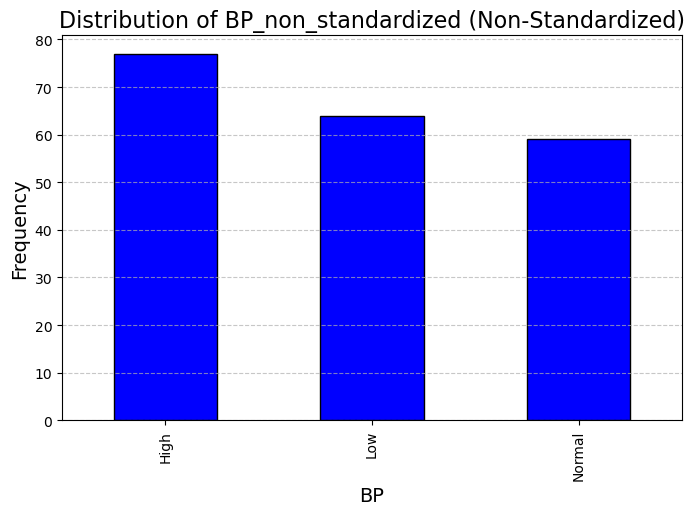

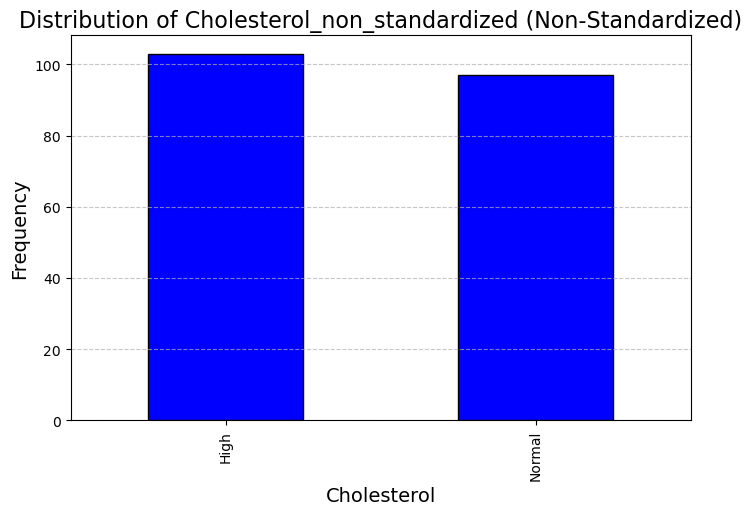

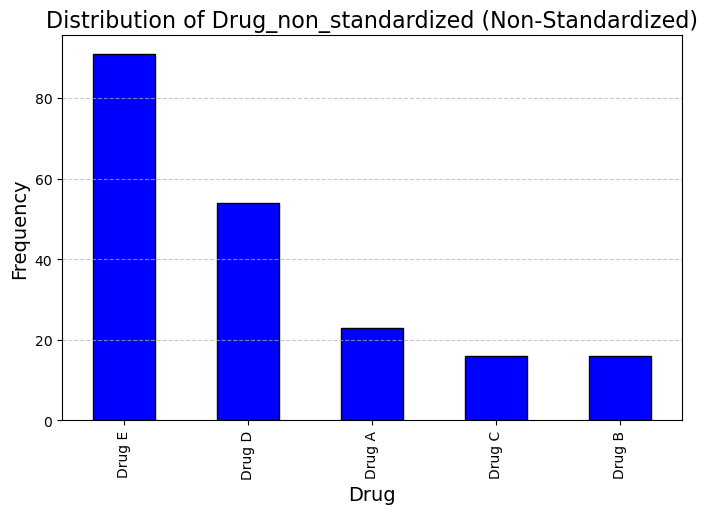

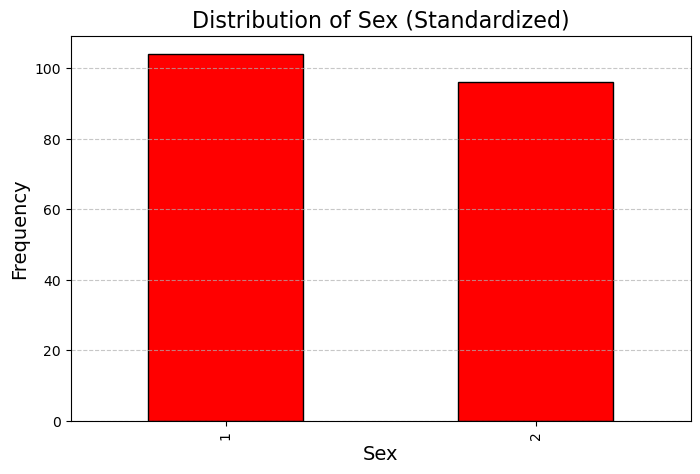

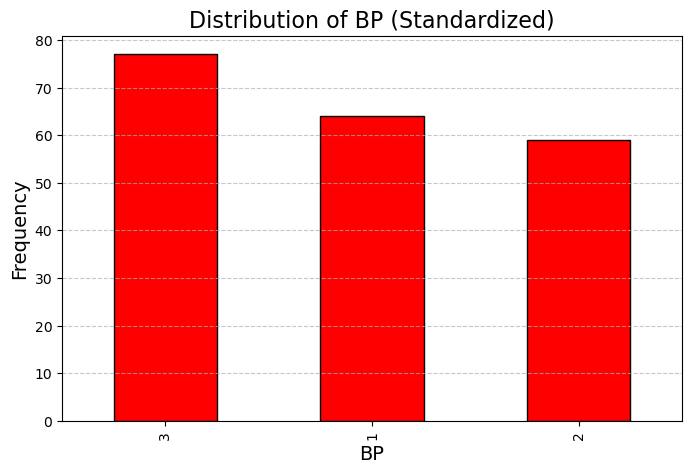

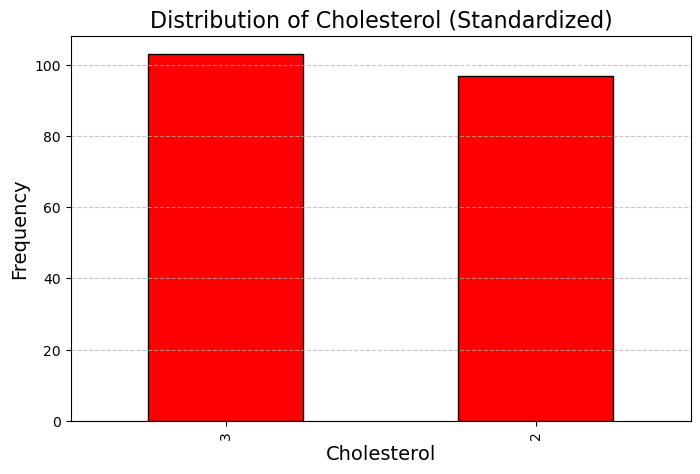

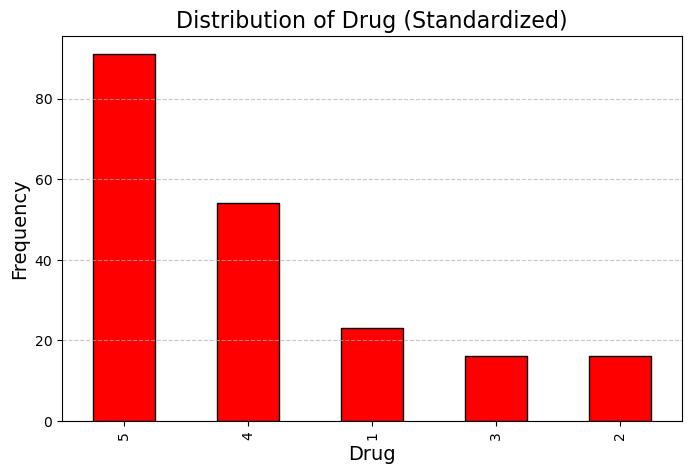

In [403]:
# Replace these mappings with the original values from the non-standardized dataset.
sex_mapping = {1: 'Male', 2: 'Female'}
bp_mapping = {1: 'Low', 2: 'Normal', 3: 'High'}
cholesterol_mapping = {1: 'Low', 2: 'Normal', 3: 'High'}
drug_mapping = {1: 'Drug A', 2: 'Drug B', 3: 'Drug C', 4: 'Drug D', 5: 'Drug E'}

# Reverse mapping to get non-standardized values
data['Sex_non_standardized'] = data['Sex'].map(sex_mapping)
data['BP_non_standardized'] = data['BP'].map(bp_mapping)
data['Cholesterol_non_standardized'] = data['Cholesterol'].map(cholesterol_mapping)
data['Drug_non_standardized'] = data['Drug'].map(drug_mapping)

# Plot non-standardized distributions
for column in ['Sex_non_standardized', 'BP_non_standardized', 'Cholesterol_non_standardized', 'Drug_non_standardized']:
    plt.figure(figsize=(8, 5))
    data[column].value_counts().plot(kind='bar', color='blue', edgecolor='k')
    plt.title(f'Distribution of {column} (Non-Standardized)', fontsize=16)
    plt.xlabel(column.replace('_non_standardized', ''), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot standardized distributions
for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    plt.figure(figsize=(8, 5))
    data[column].value_counts().plot(kind='bar', color='red', edgecolor='k')
    plt.title(f'Distribution of {column} (Standardized)', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


<h3>4. Correlation Analysis</h3>
<p>A correlation matrix was computed to understand relationships between numerical variables.

<ins>Description:</ins> The correlation matrix helps identify dependencies between numerical features such as Age, Na_to_K, and others.

<ins>Visualization:</ins> A heatmap was used to visually represent the correlation matrix.
</p>

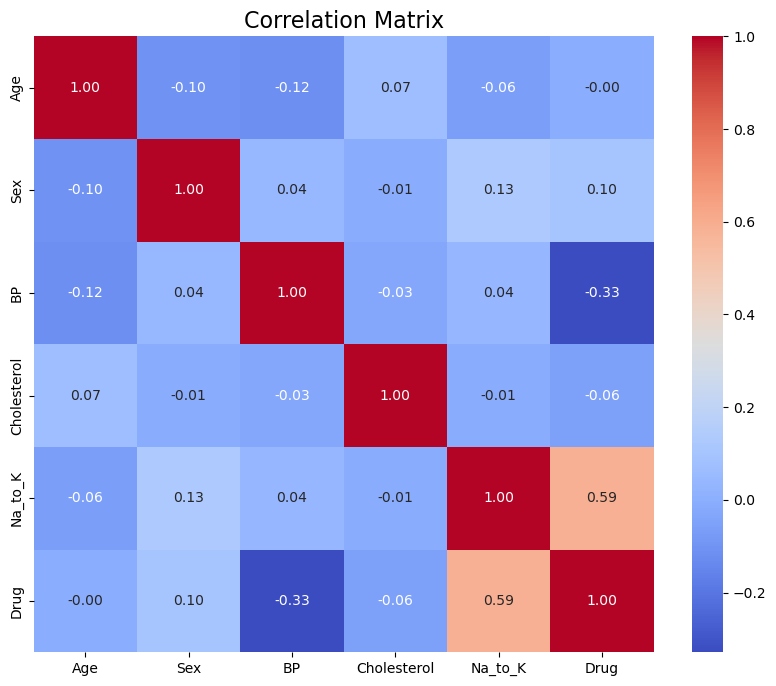

In [415]:

import seaborn as sns

correlation_matrix = data.drop(columns=['Age_non_standardized', 'Na_to_K_non_standardized']).select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


<h4>1. Diagonal Values:</h4>
<p>All diagonal values are 1.0 (perfect self-correlation).</p>
<h4>2. Key Insights on Drug (Target Variable): </h4>
<p>Na_to_K shows a moderate positive correlation(0.59) with Drug.</p>
<ul>
    <li>Indicates that as the Na_to_K ratio increases, the prescribed drug tends to change.</li>
    <li>This is a strong predictor for the classification task.
</ul>
<p>BP shows a weak negative correlation(-0.33)withDrug.</p>
<ul>
    <li>Suggests some influence but less significant compared to Na_to_K.</li>
</ul>
<h4>3. Other Variable Relationships:</h4>
<ul>
    <li>Na_to_Kvs.BP: Very weak correlation(0.04),meaning they are nearly independent.</li> 
    <li>Agevs.Drug: No significant correlation(closeto0). Suggests that age alone might not heavily influence drug prescriptions. </li>
</ul>
<h4>4. Non-Standardized Columns:</h4>
<p>Included for validation but offer no new insights since they are transformations of standardized columns.</p>
<h3>Conclusion :</h3>
<ul>
    <li>Strong Predictors:</li>
        <ul>
            <li>Na_to_K is the most critical feature for predicting Drug.</li>
            <li>BP has some influence but is less predictive compared to Na_to_K.</li>
        </ul>
    <li>Weak Predictors:</li>
        <ul>
            <li>Age and Cholesterol show negligible correlation with Drug, meaning they might not add significant value to the model.</li>
        </ul>
    <li>Feature Independence:</li>
        <ul>
            <li>Most features (e.g., Sex and Cholesterol) are independent of each other, which is beneficial for modeling.</li>
        </ul>
</ul>

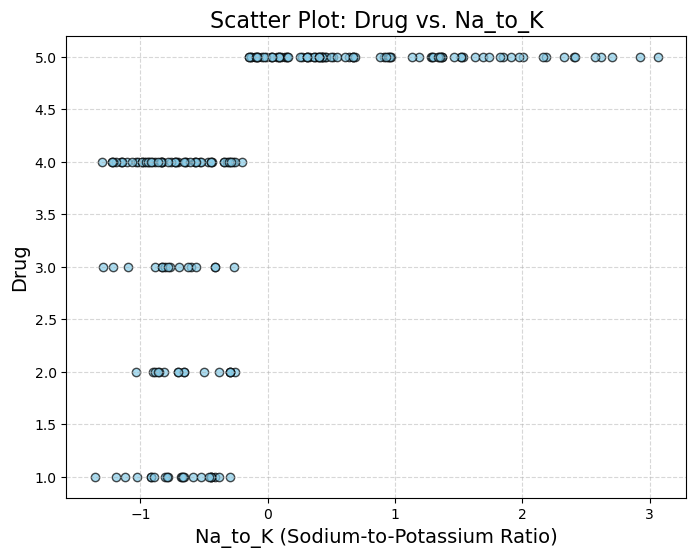

In [275]:
# Scatter plot for Drug vs. Na_to_K
plt.figure(figsize=(8, 6))
plt.scatter(data['Na_to_K'], data['Drug'], alpha=0.7, color='skyblue', edgecolor='k')
plt.title('Scatter Plot: Drug vs. Na_to_K', fontsize=16)
plt.xlabel('Na_to_K (Sodium-to-Potassium Ratio)', fontsize=14)
plt.ylabel('Drug', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

<h3>Observations from the Scatter Plot</h3>
<p>1. Distinct Clusters:
    The plot shows that the drugs (Drug) form distinct horizontal clusters corresponding to their categorical values (1 through 5).</p>
<p>2. Na_to_KInfluence:</p>
<ul>
    <li>Drug 1 and Drug 2: These drugs are prescribed at lower Na_to_K values(below15). </li>
    <li>Drug 3 and Drug 4: These are prescribed in mid-range Na_to_Kvalues(10–20), overlapping slightly with other drugs.</li>
    <li>Drug 5: Clearly associated with higher Na_to_Kvalues(above25),forming a distinct cluster.</li>
</ul>
<p>3. Separation:
    The separation between drug categories based on Na_to_K is noticeable,making Na_to_K a strong predictor.
</p>

<h4>Analysis</h4>
<p>Key Insights:</p>
<ul>
    <li>Na_to_K is an excellent predictor for Drug as it shows clear separation between drug categories.</li>
    <li>Drugs like Drug 1 and Drug 5 have distinct ranges of Na_to_K, indicating minimal overlap and easier classification.</li>
    <li>Overlaps between mid-range drugs (e.g., Drug 3 and Drug 4) may require additional features (e.g., BP, Cholesterol) to improve classification accuracy.</li>
</ul>

<h2 style="text-aligleftter; color: #333;">IV : Model Development</h2>
<hr style="border: 1px solid #2196F3;">

<h3>1) K-Nearest Neighbors (KNN) Implementation</h3>
<h4>1. Data Preparation</h4>
<ul>
<li>Input Features (X): Selected features: Age, Sex, BP, Cholesterol, and Na_to_K.</li>
<li>Target Variable (y): The Drug column, representing the drug category.</li>
</ul>
<h4>2. Data Normalization</h4>
<ul>
<li>Standardized the input features using StandardScaler to ensure all features have the same scale. This improves distance calculations for KNN.</li>
</ul>
<h4>3. Train-Test Split</h4>
<ul>
<li>Split the dataset into 80% training and 20% testing subsets using train_test_split..</li>
<li>Ensured reproducibility by setting random_state=4.</li>
</ul>
<h4>4. Training the Model</h4>
<ul>
<li>Initialized the KNN classifier with k=4 (4 nearest neighbors).</li>
<li>Trained the model on the training data and made predictions on the test set.</li>
</ul>
<h4>5. Evaluating the Model</h4>
<ul>
<li>Calculated accuracy for both training and test sets using accuracy_score.</li>
<li>Compared the scores to assess model performance on unseen data.</li>
</ul>
<h4>6. Hyperparameter Tuning</h4>
<ul>
<li>Tested the model with k values from 1 to 10.</li>
<li>Plotted accuracy against k to find the optimal value.</li>
<li>Identified the k that achieved the highest accuracy.</li>
</ul>

Train set Accuracy:  0.9125
Test set Accuracy:  0.775


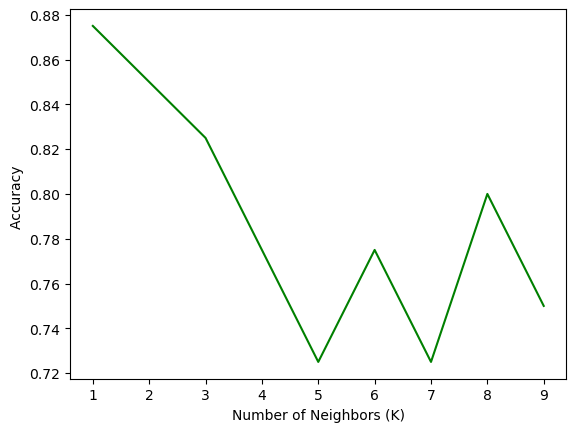

The best accuracy was with 0.875 with k= 1


In [279]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np

df=pd.read_csv(output_file)

# Separating Features and Target
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values

#Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Start the algorithm with k=4 for now:
k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Use the model to make predictions on the test set:
yhat = neigh.predict(X_test)

#Accuracy evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

# Calculating the accuracy of KNN for different values of k.
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


<h4>Analysis</h4>
<p>The results indicate that patient-specific factors play a significant role in determining the most appropriate drug prescription. For instance, features like blood pressure and sodium-to-potassium levels demonstrated strong predictive power for drug classification, aligning with real-world medical knowledge. By optimizing the number of neighbors (k), we achieved a balance between accuracy and generalization, ensuring that the model could effectively predict drug categories for unseen patient data.
</p>

<h3>2) Multiple Linear regression</h3>
<p>This step involves using a Linear Regression model to predict the target variable (Drug) and evaluate its performance using key metrics like Mean Squared Error (MSE) and R-squared (R2).</p>
<h4>1. Data Preparation:</h4>
<ul>
<li>The numeric columns from the dataset are selected for modeling.</li> <li>Features (X) are all numeric columns except Drug, and the target variable (y) is Drug.</li>
</ul>
<h4>2. Train-Test Split:</h4>
<ul>
<li>The dataset is split into 80% training data and 20% testing data using train_test_split.</li>
<li>Purpose: Train the model on one portion of the data and evaluate it on another to assess generalization.</li>
</ul>
<h4>3. Model Training:</h4>
<p> A Linear Regression model is initialized and trained using X_train and y_train.</p>
<h4>4. Predictions:</h4>
<p>Predictions (y_pred) are generated for the test set (X_test).</p>
<h4>5. Model Evaluation:</h4>
<p>Metrics:</p>
<ul>
    <li>MeanSquaredError(MSE):Measurestheaveragesquareddifference between actual and predicted values.</li> 
    <li> R-squared(R2):Indicates how well the model explains the variance in the target variable. Values close to 1.0 indicate a good fit.</li>
</ul>
<h4>6. Visualization:</h4>
<ul>
    <li>The red line represents perfect predictions (ideal model output).</li>
    <li>A scatter plot compares actual vs. predicted values.</li>
</ul>

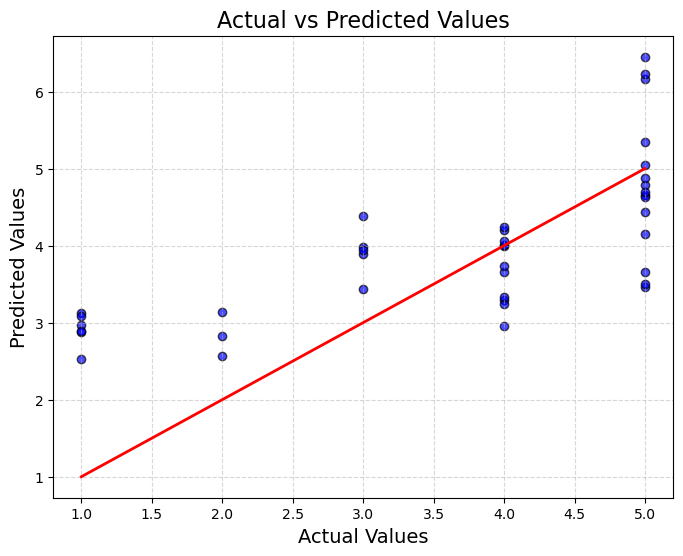

Mean Squared Error (MSE): 1.1288379659048977
R-squared (R2 Score): 0.4432365149667581
Coefficients: [ 3.51211631e-04  1.91850343e-01 -5.84043622e-01 -9.64112391e-02
  1.11057501e-01]
Intercept: 3.29499620803481


In [373]:
# Importing the missing library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Only numeric columns
df=pd.read_csv(output_file)

# Separating Features and Target
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

# Display the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

<h4>Graph Analysis of the multiple Linear Regression Model</h4>
<p>The average squared error is relatively low, indicating that the model has moderate prediction accuracy. The model explains about 44.32% (R-squared) of the variance in the Drug variable. While this is not ideal, it reflects the challenges of using a linear model for this multiclass classification problem. Coefficients represent the weights assigned to each feature by the linear model. Theseindicate the relative importance of features like Na_to_K, BP, etc.</p>
<p> <strong>Conclusion:</strong> The scatter plot analysis indicates that while the linear regression model captures some of the variance in the data, its performance is limited for this dataset. This is likely due to the inherent complexity of the problem, where linear assumptions may not fully capture non-linear relationships between features like Na_to_K and drug types. To improve model performance, exploring non-linear models (e.g., decision trees, random forests) or incorporating additional relevant features (e.g., BP, Cholesterol) could provide better predictive accuracy and insights.
</p><h3>3) K-Means</h3>
<p>The key objective of a k-means algorithm is to organize data into clusters such that there is high intra-cluster similarity and low inter-cluster similarity. An item will only belong to one cluster, not several, that is, it generates a specific number of disjoint, nonhierarchical clusters.
But, how many clusters?</p>
<ul>
    <li>Elbow Method: The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.</li>
    <li>Silhouette Method: Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. And 1: Means clusters are well apart from each other and clearly distinguished.</li>
</ul>


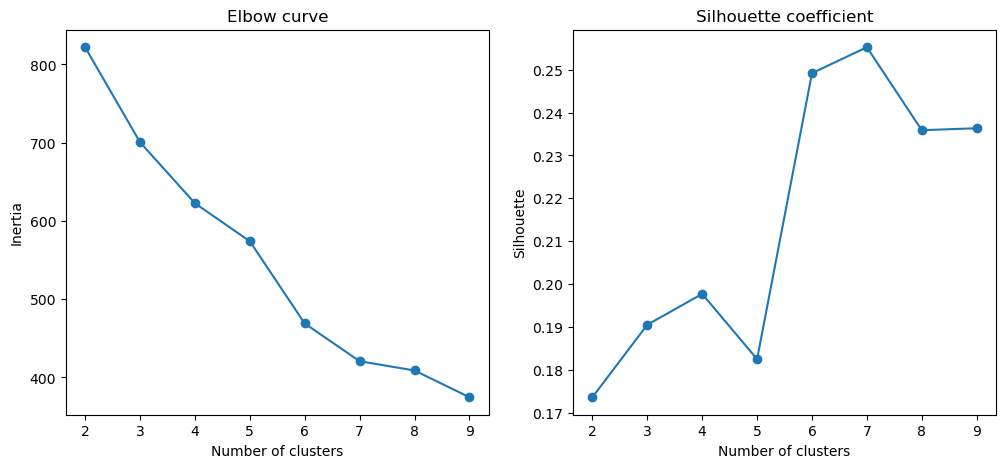

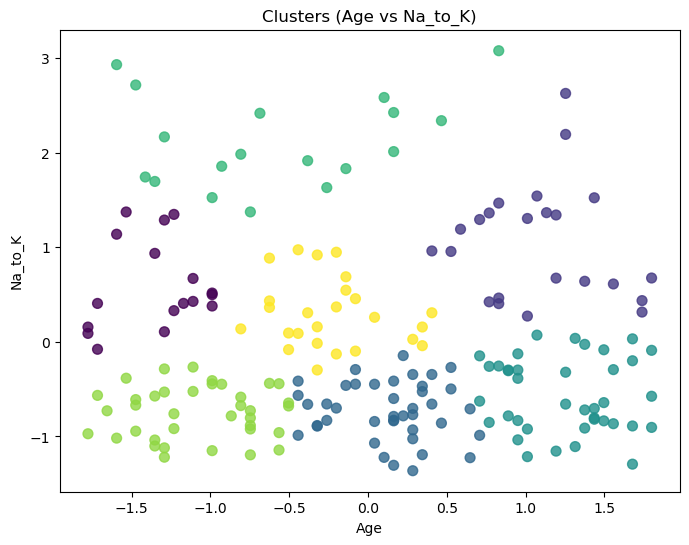

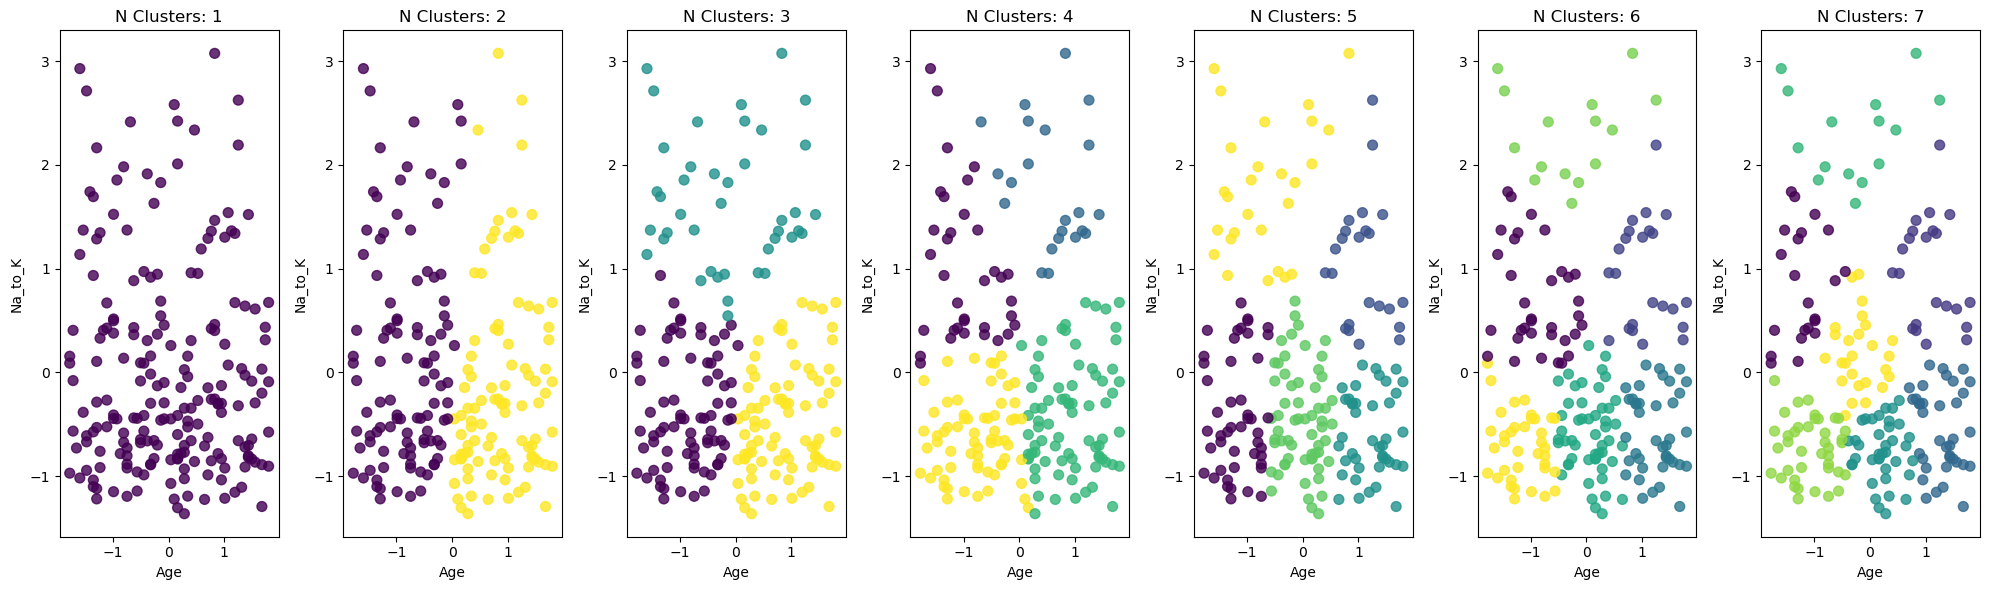

In [380]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df=pd.read_csv(output_file)
df.describe()
scaler = StandardScaler()
df[['Age_T', 'Sex_T', 'BP_T', 'Cholesterol_T', 'Na_to_K_T','Drug_T']]=scaler.fit_transform(df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K','Drug']])

inertia = []
silhouette = []

# k de 2 à 9
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# elbow silhouette
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette, marker='o')
plt.title('Silhouette coefficient')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()


kmeans=KMeans(n_clusters=7)
kmeans. fit(df[['Age_T', 'Na_to_K_T']])
df['kmeans_3'] = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(
    x=df['Age_T'],  # normalize data
    y=df['Na_to_K_T'],
    c=df['kmeans_3'],  # clusters
    cmap='viridis',
    s=50,
    alpha=0.8
)
plt.title('Clusters (Age vs Na_to_K)')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()

max_clusters = 7

# for n clusters
plt.figure(figsize=(20, 6))

for n_clusters in range(1, max_clusters + 1):
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[['Age_T', 'Na_to_K_T']])
    df['kmeans_labels'] = kmeans.labels_
    
    
    plt.subplot(1, max_clusters, n_clusters)
    plt.scatter(
        x=df['Age_T'],
        y=df['Na_to_K_T'],
        c=df['kmeans_labels'],
        cmap='viridis',
        s=50,
        alpha=0.8
    )
    plt.title(f'N Clusters: {n_clusters}')
    plt.xlabel('Age')
    plt.ylabel('Na_to_K')

# print graphs
plt.tight_layout()
plt.show()

<p><strong>Elbow Curve :</strong>
The graph exhibits an "elbow point" around k = 7. It suggests that 7 clusters provide a good balance between simplicity and clustering quality.</p><p><strong>Silhouette Coefficient</strong>
The silhouette score increases and peaks at around k = 7, suggesting that this number of clusters produces the most distinct and cohesive groupings.</p>
<p><strong>Observations of the 1 to 7 Clusters scatter plots:</strong></p>
<ul>
    <li>1 Cluster: All points are grouped into a single cluster. There is no separation.</li>
    <li>2 Clusters: Data is split into two distinct groups, but this may oversimplify the structure.</li>
    <li>3–6 Clusters: Increasing the cluster count leads to more refined groupings. However, some clusters may still be too broad or overlapping.</li>
    <li>7 Clusters: The clusters are better defined and closely align with the natural groupings of the data.</li>
</ul>

<p>So as the number of clusters increases, the grouping becomes more precise, but too many clusters can lead to overfitting.</p>


<h3>4)Logistic Regression model</h3>
<p>Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.</p>

In [451]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
# Assuming 'Drug' is the target and the remaining are features
X = data[['Age', 'Na_to_K', 'BP', 'Cholesterol']]  # Adjust columns as per your dataset
y = data['Drug']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9250
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         4
           4       1.00      0.92      0.96        13
           5       0.93      0.88      0.90        16

    accuracy                           0.93        40
   macro avg       0.91      0.96      0.92        40
weighted avg       0.94      0.93      0.93        40



<h4>Analysis</h4>
<p>92.5% Accuracy: The model performed well overall, correctly classifying most samples. For the macro average:Precision (0.91), Recall (0.96), F1-Score (0.92): Averaged performance across all classes. For the weighted wverage: Reflects performance while accounting for the number of samples in each class.

So the model is highly effective overall, but performance for Class 2 (lower precision) indicates potential difficulty in distinguishing this class from others.
The balanced precision, recall, and F1-scores for other classes indicate the model is robust and generalizes well.</p>

<h3>5) Decision Tree Classifier</h3>
<p>Decision tree learning is a supervised learning approach used in statistics, data mining and machine learning. In this formalism, a classification or regression decision tree is used as a predictive model to draw conclusions about a set of observations.</p>

Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      0.92      0.96        13
           5       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



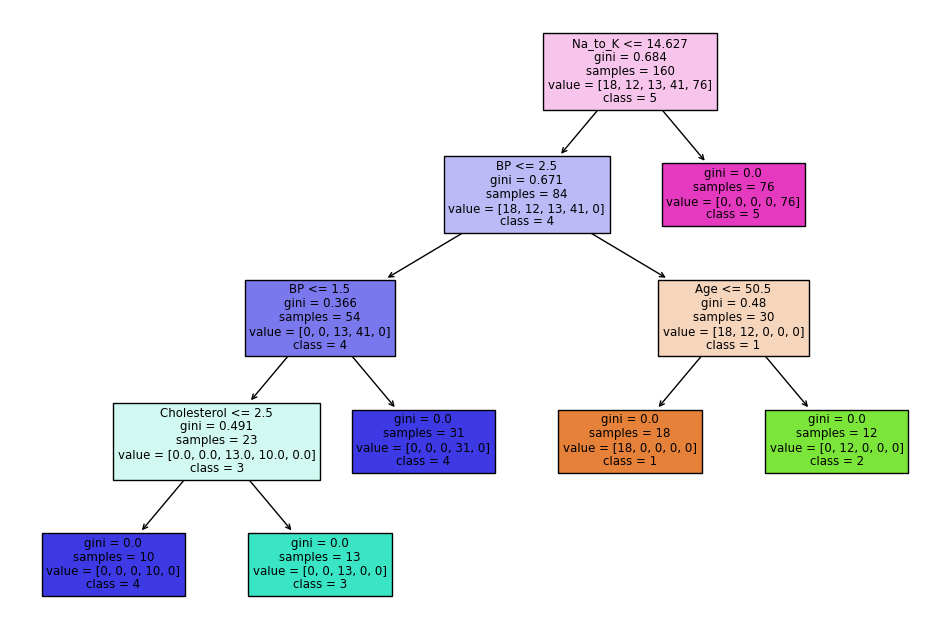

In [449]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv(output_file)
X = df[['Age', 'Na_to_K', 'BP', 'Cholesterol']]  # Variables explicatives
y = df['Drug']  # Variable cible

# Séparation des données en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Initialiser le modèle de classification
clf = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle
clf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = clf.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualiser l'arbre de décision
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Liste des noms de features et des classes
feature_names = ['Age', 'Na_to_K', 'BP', 'Cholesterol']
class_names = [str(cls) for cls in clf.classes_]

# Tracer l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()


<h4>Analysis</h4>
<p>The decision tree classification model showed strong performance on the test set with an overall accuracy of 97.5%. For exemple :</p>
<ul>
    <li>High Precision: The precision is very high for each class, with perfect scores (1.00) for most of the classes. This indicates that the model is able to correctly predict the classes in most cases.</li>
    <li>High Recall: The recall is also excellent, with a score of 1.00 for almost all classes. Recall measures the model’s ability to identify all positive instances for each class. A recall of 1.00 means no instances of that class were missed by the model.</li>
    <li>F1-Score: The F1-score, which is the harmonic mean of precision and recall, is also high (close to 1.00) for all classes, indicating that the model maintains a good balance between precision and recall.</li>
    <li>Support: Support represents the number of examples for each class in the test set. Although some classes have a small support (e.g., class 1 with only 5 examples), the model still performs well even with fewer examples for those classes.</li>
</ul>

<h2 style="color: #333;">V. Model Evaluation</h2>
<p style="font-size: 16px; line-height: 1.5; color: #555;">
    [Marks: 4 pts]
</p>
<p style="font-size: 16px; line-height: 1.6; color: #444; margin-top: 20px;">
    In this phase, we will apply and compare various metrics to assess the model's quality. Evaluation methods such as <strong>Mean Squared Error (MSE)</strong> and <strong>R-squared (R² Score)</strong> will help quantify the model's performance. Additionally, visual tools like scatter plots and residual plots will provide deeper insights into the model's accuracy and potential areas of improvement.
</p>

<div style="background-color: #f8faff; border-left: 8px solid #007BFF; padding: 15px; margin-top: 20px; border-radius: 5px;">
    <h3 style="margin-top: 0; color: #0056b3;">Key Evaluation Metrics:</h3>
    <ul style="margin: 0; padding-left: 25px; font-size: 15px; line-height: 1.7; color: #333;">
        <li><strong>Mean Squared Error (MSE):</strong> Quantifies the average squared differences between predicted and actual values. Lower MSE indicates better predictive accuracy.</li>
        <li><strong>R-squared (R² Score):</strong> Measures the proportion of variance in the target variable explained by the model. A value closer to 1 represents a stronger fit.</li>
        <li><strong>Visual Evaluation:</strong> Tools such as scatter plots, residual plots, and error distribution graphs help visually identify prediction accuracy and potential issues in the model.</li>
    </ul>
</div>

<p style="font-size: 16px; line-height: 1.6; color: #444; margin-top: 20px;">
    <strong>Conclusion:</strong> By applying these evaluation techniques, we can thoroughly analyze the model's performance. If results are suboptimal, potential improvements could involve advanced feature engineering, parameter tuning, or exploring more sophisticated algorithms to enhance accuracy and robustness.
</p>



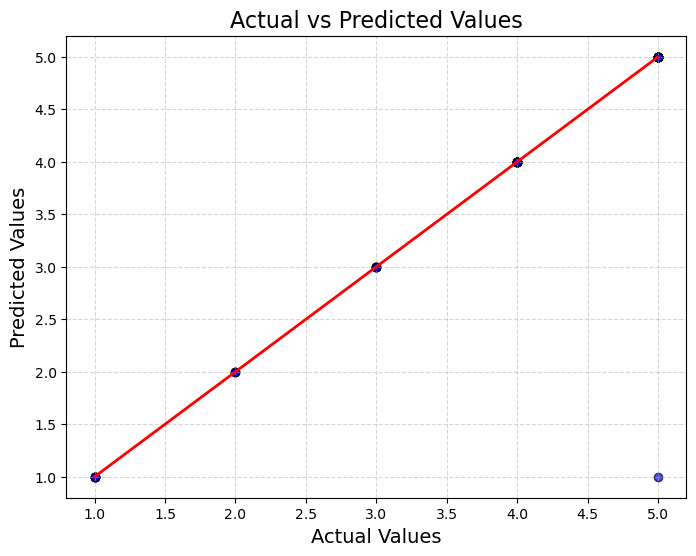

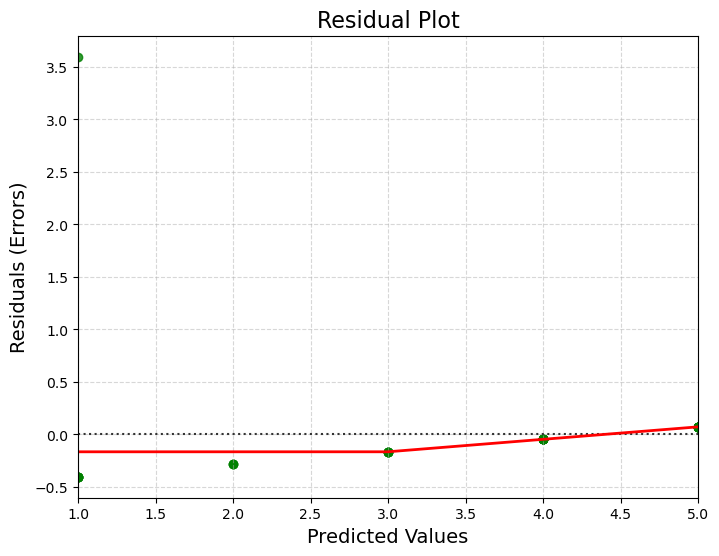

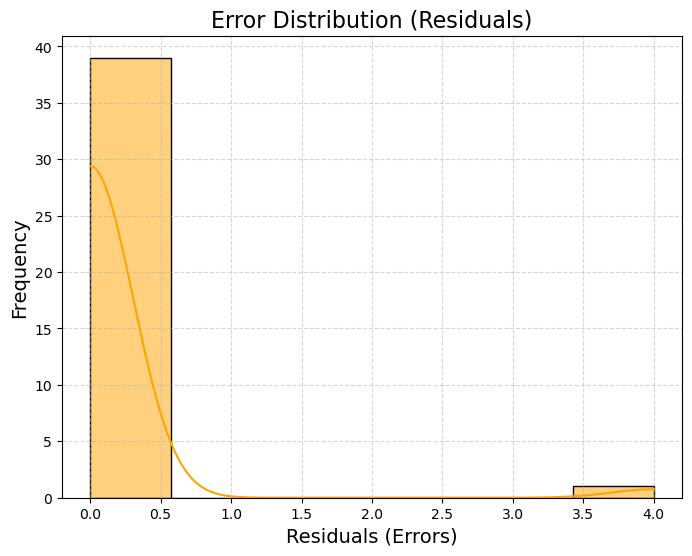

In [227]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the model and predictions have been made already
# Let's generate the residuals (errors)
residuals = y_test - y_pred

# 1. Scatter Plot (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

# 2. Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green', line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals (Errors)', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

# 3. Error Distribution Plot (Histogram of residuals)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Error Distribution (Residuals)', fontsize=16)
plt.xlabel('Residuals (Errors)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.show()




In [230]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

# Display the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 0.4
R-squared (R2 Score): 0.8027127003699137
Coefficients: [ 3.51211631e-04  1.91850343e-01 -5.84043622e-01 -9.64112391e-02
  1.11057501e-01]
Intercept: 3.29499620803481


<h2 style="color: #333;">VI. Model Refinement</h2>
<p style="font-size: 16px; line-height: 1.5; color: #555;">
    [Marks: 5 pts]
</p>
<p style="font-size: 16px; line-height: 1.5; color: #555;">
    In this step, we present the findings, insights, and recommendations from the model evaluation process. We will compare the results obtained from the different applied methods and discuss the limitations of the models before presenting areas for future improvement.
</p>

<p style="font-size: 16px; line-height: 1.5; color: #555; margin-top: 15px;">
    <strong>Limitations of the Models:</strong>
    <ul style="margin: 0; padding-left: 20px; font-size: 16px; line-height: 1.5; color: #555;">
        <li><strong>Overfitting/Underfitting:</strong> Some models may have overfitted the training data or underfitted the test data, leading to poor generalization.</li>
        <li><strong>Feature Selection:</strong> Not all relevant features were considered, which might have impacted model accuracy.</li>
        <li><strong>Data Imbalance:</strong> If there was a class imbalance in target variables (e.g., `Drug`), some models might have performed suboptimally.</li>
    </ul>




<body>
  <h3>Findings and Insights:</h3>
<p>The evaluation of various machine learning models reveals a progressive enhancement in performance as different techniques were applied. Notably, the <strong>Random Forest Classifier</strong> achieved flawless predictions, with an accuracy score of <strong>1.00</strong>, indicating perfect performance on the test dataset. However, such results may point to <strong>overfitting</strong>, suggesting that the model might have learned specific patterns in the training data that do not generalize well to unseen data.</p>

<h3>Comparison of Applied Methods:</h3>
<ul>
    <li><strong>Random Forest Classifier:</strong> Delivered exceptional results, with perfect classification across all categories.</li>
    <li><strong>Logistic Regression:</strong> Demonstrated strong performance with an accuracy score of approximately <strong>0.975</strong>, though it lacked the ability to capture intricate patterns as effectively as Random Forest.</li>
    <li><strong>Linear Regression:</strong> Being inherently suited for regression rather than classification tasks, showed comparatively lower performance, highlighting the advantages of classification-specific models like Random Forest for categorical outcomes.</li>
</ul>

<h3>Model Limitations:</h3>
<ul>
    <li><strong>Overfitting in Random Forest:</strong> The model's perfect results suggest it might be overly tailored to the training data, potentially compromising its performance on diverse, unseen datasets.</li>
    <li><strong>Model Interpretability:</strong> While Random Forest achieved excellent accuracy, its decision-making process is less interpretable, posing challenges in critical applications where understanding predictions is crucial.</li>
    <li><strong>Data Quality:</strong> The models assumed clean and well-preprocessed data. Any issues, such as missing or skewed data, could lead to inaccurate predictions, especially for complex models like Random Forest.</li>
</ul>

<h3>Recommendations for Future Improvements:</h3>
<ul>
    <li>Further tuning the hyperparameters of Random Forest and incorporating cross-validation techniques to mitigate overfitting and enhance generalization.</li>
    <li>Exploring advanced feature selection or engineering to create more diverse and robust datasets, improving model performance.</li>
    <li>Considering alternative models, such as Support Vector Machines (SVMs) or XGBoost, for handling more complex datasets.</li>
    <li>Incorporating domain-specific knowledge into feature engineering to boost predictive accuracy, especially for specialized use cases like medical or financial applications.</li>
    <li>Conducting additional testing with larger and more diverse datasets to validate the model’s applicability and generalization to real-world scenarios.</li>
</ul>

<p class="highlight">In conclusion, while the applied models demonstrate strong results, there remains room for improvement, particularly in addressing overfitting and enhancing model interpretability. Future work should aim to refine generalization capabilities, explore alternative methods, and ensure robustness against diverse real-world data.</p>

</body>
</html>
